# MPI MergeSort Weak Scaling Analysis

In [1]:
import json
import os

import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

What are the files we are analyzing?

In [2]:
import os

# Directory containing CALI files (same as the script directory)

# Element to remove
element_to_remove = 'comp_small'

cali_files_directory = "."
# Iterate through each CALI file in the directory
for filename in os.listdir(cali_files_directory):
    if filename.endswith('.cali'):
        file_path = os.path.join(cali_files_directory, filename)

        # Read the content of the CALI file
        with open(file_path, 'r') as file:
            cali_data = file.readlines()

        # Filter out lines related to "comp_small" and the line immediately underneath it
        filtered_cali_data = []
        skip_next_line = False
        for line in cali_data:
            if element_to_remove in line:
                skip_next_line = True
            elif skip_next_line:
                skip_next_line = False
            else:
                filtered_cali_data.append(line)

        # Save the modified content back to the file
        with open(file_path, 'w') as file:
            file.writelines(filtered_cali_data)

all_files = glob("*.cali")

# Read n files (n = 33)

In [3]:
tk = th.Thicket.from_caliperreader(all_files)

What files?

In [4]:
tk.profile_mapping

OrderedDict([(34236875, 'i1-p8-a262144.cali'),
             (35565938, 'i0-p64-a1048576.cali'),
             (55387066, 'i1-p4-a67108864.cali'),
             (94698835, 'i3-p8-a65536.cali'),
             (134814991, 'i2-p8-a4194304.cali'),
             (135477666, 'i2-p16-a67108864.cali'),
             (165441638, 'i3-p2-a1048576.cali'),
             (167256875, 'i1-p2-a67108864.cali'),
             (171913956, 'i3-p64-a4194304.cali'),
             (231101350, 'i0-p4-a67108864.cali'),
             (245653826, 'i0-p16-a4194304.cali'),
             (245729521, 'i2-p16-a16777216.cali'),
             (302580615, 'i3-p2-a67108864.cali'),
             (305887361, 'i2-p4-a16777216.cali'),
             (325567074, 'i1-p8-a16777216.cali'),
             (367984706, 'i3-p8-a67108864.cali'),
             (386351023, 'i2-p1-a16777216.cali'),
             (387379756, 'i0-p64-a4194304.cali'),
             (395292098, 'i0-p8-a67108864.cali'),
             (476558639, 'i1-p64-a4194304.cali'),
         

Call tree

In [5]:
tk.statsframe.dataframe["test"] = -1
print(tk.tree(metric_column="test"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

-1.000 main
├─ -1.000 comm
│  └─ -1.000 comm_large
│     └─ -1.000 comm_small
├─ -1.000 comp
│  └─ -1.000 comp_large
├─ -1.000 data_init
└─ -1.000 data_validation

Legend (Metric: test Min: -1.00 Max: -1.00)
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Performance data

In [6]:
tk.dataframe

nid  \
node                                            profile           
{'name': 'main', 'type': 'function'}            34236875      1   
                                                35565938      1   
                                                55387066      1   
                                                94698835      1   
                                                134814991     1   
                                                135477666     1   
                                                165441638     1   
                                                167256875     1   
                                                171913956     1   
                                                231101350     1   
                                                245653826     1   
                                                245729521     1   
                                                302580615     1   
                                                305887361     1   
                                                325567074     1   
                                                367984706     1   
                                                386351023     1   
                                                387379756     1   
                                                395292098     1   
                                                476558639     1   
                                                520790344     1   
                                                545627575     1   
                                                573341532     1   
                                                593021062     1   
                                                597904221     1   
                                                598074843     1   
                                                601510037     1   
                                                649148420     1   
                                                666300467     1   
                                                692068927     1   
                                                693749637     1   
                                                779858834     1   
                                                787259565     1   
                                                800245804     1   
                                                815340623     1   
                                                832364175     1   
                                                837248334     1   
                                                885712554     1   
                                                933051938     1   
                                                954082963     1   
                                                1024660577    1   
                                                1061536587    1   
                                                1119658259    1   
                                                1129094788    1   
                                                1136301661    1   
                                                1218834660    1   
                                                1251208741    1   
                                                1279880168    1   
                                                1345500930    1   
                                                1345714006    1   
                                                1346829297    1   
                                                1349488438    1   
                                                1355910130    1   
                                                1381391930    1   
                                                1402191423    1   
                                                1441475383    1   
                                                1463096894    1   
                                                1503249267    1   
                                        

In [7]:
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Min time/rank", "Max time/rank", "Total time", "Variance time/rank"], axis=1)

In [8]:
tk.dataframe

Avg time/rank  \
node                                            profile                     
{'name': 'main', 'type': 'function'}            34236875         1.026351   
                                                35565938         3.881137   
                                                55387066       259.305960   
                                                94698835         0.626502   
                                                134814991        8.371054   
                                                135477666       63.771493   
                                                165441638        9.292026   
                                                167256875      522.658347   
                                                171913956        4.772743   
                                                231101350      249.421246   
                                                245653826        4.696420   
                                                245729521       16.398065   
                                                302580615      521.844702   
                                                305887361       63.796811   
                                                325567074       32.482282   
                                                367984706      129.083756   
                                                386351023      249.054943   
                                                387379756        4.431749   
                                                395292098      126.594465   
                                                476558639        4.679455   
                                                520790344        0.628973   
                                                545627575     1006.498488   
                                                573341532       16.511667   
                                                593021062        2.741089   
                                                597904221        0.631684   
                                                598074843        4.735398   
                                                601510037        9.189419   
                                                649148420        1.214821   
                                                666300467        8.498170   
                                                692068927      131.765503   
                                                693749637       64.674015   
                                                779858834        2.661277   
                                                787259565        1.995844   
                                                800245804        2.786485   
                                                815340623        1.445338   
                                                832364175        2.298174   
                                                837248334        1.043822   
                                                885712554      995.801520   
                                                933051938        2.730312   
                                                954082963        2.505010   
                                                1024660577       1.025334   
                                                1061536587       1.822433   
                                                1119658259       1.041394   
                                                1129094788       0.874051   
                                                1136301661       0.652286   
                                                1218834660       2.297252   
                                                1251208741      64.589366   
                                                1279880168       2.767393   
                                                1345500930       1.262660   
                                                1345714006       4.745004   
                                                13468292

Metadata

In [9]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
34236875             2.11.0-dev               8   
35565938             2.11.0-dev              64   
55387066             2.11.0-dev               4   
94698835             2.11.0-dev               8   
134814991            2.11.0-dev               8   
135477666            2.11.0-dev              16   
165441638            2.11.0-dev               2   
167256875            2.11.0-dev               2   
171913956            2.11.0-dev              64   
231101350            2.11.0-dev               4   
245653826            2.11.0-dev              16   
245729521            2.11.0-dev              16   
302580615            2.11.0-dev               2   
305887361            2.11.0-dev               4   
325567074            2.11.0-dev               8   
367984706            2.11.0-dev               8   
386351023            2.11.0-dev               1   
387379756            2.11.0-dev              64   
395292098            2.11.0-dev               8   
476558639            2.11.0-dev              64   
520790344            2.11.0-dev               8   
545627575            2.11.0-dev               1   
573341532            2.11.0-dev              16   
593021062            2.11.0-dev               8   
597904221            2.11.0-dev               4   
598074843            2.11.0-dev               4   
601510037            2.11.0-dev               2   
649148420            2.11.0-dev               1   
666300467            2.11.0-dev               8   
692068927            2.11.0-dev               2   
693749637            2.11.0-dev               4   
779858834            2.11.0-dev               2   
787259565            2.11.0-dev              16   
800245804            2.11.0-dev              64   
815340623            2.11.0-dev               4   
832364175            2.11.0-dev              32   
837248334            2.11.0-dev               2   
885712554            2.11.0-dev               1   
933051938            2.11.0-dev              64   
954082963            2.11.0-dev              64   
1024660577           2.11.0-dev               2   
1061536587           2.11.0-dev              32   
1119658259           2.11.0-dev               2   
1129094788           2.11.0-dev               8   
1136301661           2.11.0-dev               8   
1218834660           2.11.0-dev              32   
1251208741           2.11.0-dev              16   
1279880168           2.11.0-dev               8   
1345500930           2.11.0-dev              16   
1345714006           2.11.0-dev               4   
1346829297           2.11.0-dev               2   
1349488438           2.11.0-dev              32   
1355910130           2.11.0-dev              32   
1381391930           2.11.0-dev               4   
1402191423           2.11.0-dev              16   
1441475383           2.11.0-dev               2   
1463096894           2.11.0-dev               4   
1503249267           2.11.0-dev               8   
1545712314           2.11.0-dev              32   
1614746395           2.11.0-dev               2   
1625941908           2.11.0-dev               1   
1644148871           2.11.0-dev              64   
1654376694           2.11.0-dev              16   
1715039847           2.11.0-dev               4   
1719697928           2.11.0-dev               4   
1757670221           2.11.0-dev              32   
1816811437           2.11.0-dev               1   
1858311187           2.11.0-dev               2   
1910797916           2.11.0-dev               8   
1916591425           2.11.0-dev              16   
1932462589           2.11.0-dev               8   
1993683092           2.11.0-dev               4   
2045068710           2.11.0-dev               1   
2112423439           2.11.0-dev              32   
2113079843           2.11.0-dev               1   
2123376903           2.11.0-dev               2   
2183969429           2.11.0-dev  

# Goal

programmatically analyze the data by graphing it

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [10]:
gb = tk.groupby(["num_procs", "InputType"])

28  thickets created...
{(1, '1%perturbed'): <thicket.thicket.Thicket object at 0x2b332f170cd0>, (1, 'Random'): <thicket.thicket.Thicket object at 0x2b332f0b81c0>, (1, 'Reverse Sorted'): <thicket.thicket.Thicket object at 0x2b332f1ade20>, (1, 'Sorted'): <thicket.thicket.Thicket object at 0x2b332f1ec760>, (2, '1%perturbed'): <thicket.thicket.Thicket object at 0x2b332f176370>, (2, 'Random'): <thicket.thicket.Thicket object at 0x2b332f1fc130>, (2, 'Reverse Sorted'): <thicket.thicket.Thicket object at 0x2b332f22db80>, (2, 'Sorted'): <thicket.thicket.Thicket object at 0x2b332f1ded90>, (4, '1%perturbed'): <thicket.thicket.Thicket object at 0x2b332f22df70>, (4, 'Random'): <thicket.thicket.Thicket object at 0x2b332f16c7c0>, (4, 'Reverse Sorted'): <thicket.thicket.Thicket object at 0x2b332f318ca0>, (4, 'Sorted'): <thicket.thicket.Thicket object at 0x2b332f2e3160>, (8, '1%perturbed'): <thicket.thicket.Thicket object at 0x2b332f299dc0>, (8, 'Random'): <thicket.thicket.Thicket object at 0x2b332f54

Compose these 3 groups column-wise to get a holistic view of the data

In [11]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="InputSize"
)

In [12]:
ctk.dataframe

(1, 1%perturbed)  \
                                                             Avg time/rank   
node                                            InputSize                    
{'name': 'main', 'type': 'function'}            65536             1.232038   
                                                262144            4.131854   
                                                1048576          15.865853   
                                                4194304          62.781933   
                                                16777216        249.253339   
                                                67108864       1000.590322   
{'name': 'comm', 'type': 'function'}            65536             0.000292   
                                                262144            0.000878   
                                                1048576           0.002188   
                                                4194304           0.008881   
                                                16777216          0.020063   
                                                67108864          0.080258   
{'name': 'comm_large', 'type': 'function'}      65536             0.000249   
                                                262144            0.000835   
                                                1048576           0.002144   
                                                4194304           0.008833   
                                                16777216          0.020018   
                                                67108864          0.080213   
{'name': 'comm_small', 'type': 'function'}      65536             0.000237   
                                                262144            0.000816   
                                                1048576           0.002127   
                                                4194304           0.008799   
                                                16777216          0.019994   
                                                67108864          0.080188   
{'name': 'comp', 'type': 'function'}            65536             0.969001   
                                                262144            3.866032   
                                                1048576          15.563020   
                                                4194304          62.200689   
                                                16777216        248.278738   
                                                67108864        997.497624   
{'name': 'comp_large', 'type': 'function'}      65536             0.486104   
                                                262144            1.938990   
                                                1048576           7.783215   
                                                4194304          31.127374   
                                                16777216        124.270135   
                                                67108864        499.522727   
{'name': 'data_init', 'type': 'function'}       65536             0.002434   
                                                262144            0.009702   
                                                1048576           0.038096   
                                                4194304           0.152319   
                                                16777216          0.618311   
                                                67108864          2.516443   
{'name': 'data_validation', 'type': 'function'} 65536             0.000249   
                                                262144            0.001920   
                                                1048576           0.003976   
                                                4194304           0.014429   
                                                16777216          0.055918   
                                                67108864          0.221812   

                                                            (1, Random)  \
    

In [13]:
ctk.metadata

(1, 1%perturbed)                 \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev              1   
262144              2.11.0-dev              1   
1048576             2.11.0-dev              1   
4194304             2.11.0-dev              1   
16777216            2.11.0-dev              1   
67108864            2.11.0-dev              1   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   

                                                                    \
          spot:node.order           spot:output spot:time.variance   
InputSize                                                            
65536                true     i3-p1-a65536.cali               true   
262144               true    i3-p1-a262144.cali               true   
1048576              true   i3-p1-a1048576.cali               true   
4194304              true   i3-p1-a4194304.cali               true   
16777216             true  i3-p1-a16777216.cali               true   
67108864             true  i3-p1-a67108864.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1701755903  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1701755926  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1701755926  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1701755926  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1701755945  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1701755941  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                              \
                                 cmdline cluster  Algorithm ProgrammingModel   
InputSize                                                                      
65536         [./mergesort, 65536, 3, 1]       c  MergeSort              MPI   
262144       [./mergesort, 262144, 3, 1]       c  MergeSort              MPI   
1048576     [./mergesort, 1048576, 3, 1]       c  MergeSort              MPI   
4194304     [./mergesort, 4194304, 3, 1]       c  MergeSort              MPI   
1

Perform pandas operations to get the table in a desirable format for plotting

In [14]:
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.reset_index().rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

In [15]:
# Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)
ctk.dataframe = ctk.dataframe.drop(["node"], axis=1)

<ipython-input-15-c21ea0be011b>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctk.dataframe = ctk.dataframe.drop(["node"], axis=1)


In [16]:
ctk.dataframe

(1, 1%perturbed)   (1, Random) (1, Reverse Sorted)  \
                             Avg time/rank Avg time/rank       Avg time/rank   
name            InputSize                                                      
main            65536             1.232038      1.590814            1.214821   
                262144            4.131854      4.143006            4.131628   
                1048576          15.865853     15.923825           15.753438   
                4194304          62.781933     62.410328           62.338200   
                16777216        249.253339    255.080550          249.054943   
                67108864       1000.590322   1006.498488          995.801520   
comm            65536             0.000292      0.002630            0.000306   
                262144            0.000878      0.000851            0.000893   
                1048576           0.002188      0.002024            0.002225   
                4194304           0.008881      0.006144            0.008570   
                16777216          0.020063      0.022177            0.021160   
                67108864          0.080258      0.080633            0.080157   
comm_large      65536             0.000249      0.002584            0.000258   
                262144            0.000835      0.000807            0.000849   
                1048576           0.002144      0.001985            0.002176   
                4194304           0.008833      0.006101            0.008529   
                16777216          0.020018      0.022131            0.021118   
                67108864          0.080213      0.080589            0.080112   
comm_small      65536             0.000237      0.002565            0.000245   
                262144            0.000816      0.000790            0.000822   
                1048576           0.002127      0.001969            0.002153   
                4194304           0.008799      0.006083            0.008509   
                16777216          0.019994      0.022102            0.021089   
                67108864          0.080188      0.080562            0.080085   
comp            65536             0.969001      0.978340            0.961466   
                262144            3.866032      3.882163            3.872274   
                1048576          15.563020     15.647901           15.489815   
                4194304          62.200689     62.063978           61.882749   
                16777216        248.278738    254.477833          248.504129   
                67108864        997.497624   1004.937260          995.014720   
comp_large      65536             0.486104      0.492597            0.479496   
                262144            1.938990      1.960797            1.932989   
                1048576           7.783215      7.873428            7.745609   
                4194304          31.127374     31.270730           30.930218   
                16777216        124.270135    128.155915          124.253566   
                67108864        499.522727    507.414819          497.691609   
data_init       65536             0.002434      0.000800            0.000310   
                262144            0.009702      0.003120            0.001321   
                1048576           0.038096      0.011593            0.004717   
                4194304           0.152319      0.045023            0.016915   
                16777216          0.618311      0.177720            0.066002   
                67108864          2.516443      0.708440            0.260038   
data_validation 65536             0.000249      0.000514            0.000209   
                262144            0.001920      0.002259            0.001791   
                1048576           0.003976      0.008436            0.003536   
                4194304           0.014429      0.032083            0.012374   
                16777216          0.055918      0.142490            0.048360   
                67108864  

In [17]:
# Define common variables
InputTypes = set(tk.metadata["InputType"].to_list())

function_names = set(ctk.dataframe.index.get_level_values("name"))
# threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
# matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [18]:
print(InputTypes)
print(function_names)

{'Sorted', 'Random', 'Reverse Sorted', '1%perturbed'}
{'main', 'comm', 'comm_small', 'comp', 'comm_large', 'data_init', 'comp_large', 'data_validation'}


In [19]:
ctk.dataframe.columns

MultiIndex([(    (1, '1%perturbed'), 'Avg time/rank'),
            (         (1, 'Random'), 'Avg time/rank'),
            ( (1, 'Reverse Sorted'), 'Avg time/rank'),
            (         (1, 'Sorted'), 'Avg time/rank'),
            (    (2, '1%perturbed'), 'Avg time/rank'),
            (         (2, 'Random'), 'Avg time/rank'),
            ( (2, 'Reverse Sorted'), 'Avg time/rank'),
            (         (2, 'Sorted'), 'Avg time/rank'),
            (    (4, '1%perturbed'), 'Avg time/rank'),
            (         (4, 'Random'), 'Avg time/rank'),
            ( (4, 'Reverse Sorted'), 'Avg time/rank'),
            (         (4, 'Sorted'), 'Avg time/rank'),
            (    (8, '1%perturbed'), 'Avg time/rank'),
            (         (8, 'Random'), 'Avg time/rank'),
            ( (8, 'Reverse Sorted'), 'Avg time/rank'),
            (         (8, 'Sorted'), 'Avg time/rank'),
            (   (16, '1%perturbed'), 'Avg time/rank'),
            (        (16, 'Random'), 'Avg time/rank'),
          

<Axes: xlabel='InputSize'>

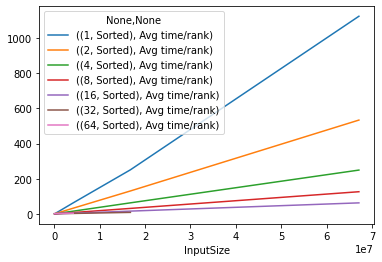

In [20]:
ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][1] == "Sorted" and col[1] == "Avg time/rank"]].loc["main"].plot()

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [21]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [22]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [23]:
ctk.dataframe.loc["main"]

(1, 1%perturbed)   (1, Random) (1, Reverse Sorted)   (1, Sorted)  \
             Avg time/rank Avg time/rank       Avg time/rank Avg time/rank   
InputSize                                                                    
65536             1.232038      1.590814            1.214821      1.218285   
262144            4.131854      4.143006            4.131628      4.107199   
1048576          15.865853     15.923825           15.753438     15.721955   
4194304          62.781933     62.410328           62.338200     63.675934   
16777216        249.253339    255.080550          249.054943    250.953895   
67108864       1000.590322   1006.498488          995.801520   1122.491604   

          (2, 1%perturbed)   (2, Random) (2, Reverse Sorted)   (2, Sorted)  \
             Avg time/rank Avg time/rank       Avg time/rank Avg time/rank   
InputSize                                                                    
65536             1.043822      1.025334            1.211747      1.041394   
262144            2.604852      2.602096            2.661277      2.877565   
1048576           9.292026      8.945882            9.189419      8.805542   
4194304          34.660888     32.713537           32.945949     33.210500   
16777216        127.490916    130.768085          131.765503    130.883647   
67108864        521.844702    522.658347          528.732568    533.209387   

          (4, 1%perturbed)   (4, Random) (4, Reverse Sorted)   (4, Sorted)  \
             Avg time/rank Avg time/rank       Avg time/rank Avg time/rank   
InputSize                                                                    
65536             0.631684      0.653670            0.873902      0.613942   
262144            1.435547      1.445338            1.435883      1.432109   
1048576           4.780063      4.735398            4.708102      4.745004   
4194304          16.386622     16.568951           15.858858     16.331783   
16777216         64.848201     64.674015           63.796811     63.465004   
67108864        258.893537    259.305960          257.357587    249.421246   

          (8, 1%perturbed)   (8, Random) (8, Reverse Sorted)   (8, Sorted)  \
             Avg time/rank Avg time/rank       Avg time/rank Avg time/rank   
InputSize                                                                    
65536             0.626502      0.652286            0.874051      0.628973   
262144            1.031101      1.026351            1.017314      1.030022   
1048576           2.761032      2.767393            2.752059      2.741089   
4194304           8.498170      8.493937            8.371054      8.402902   
16777216         32.484534     32.482282           32.161437     31.867343   
67108864        129.083756    128.180126          126.281922    126.594465   

          (16, 1%perturbed)  (16, Random) (16, Reverse Sorted)  (16, Sorted)  \
              Avg time/rank Avg time/rank        Avg time/rank Avg time/rank   
InputSize                                                                      
65536              0.818987      0.848354             0.837077      1.262660   
262144             1.068802      1.052555             1.044279      1.042765   
1048576                 NaN      1.995844             1.976988      2.027011   
4194304            4.804057      4.746376             4.652227      4.696420   
16777216          17.057287     16.797780            16.398065     16.511667   
67108864          66.199639     64.589366            63.771493     63.313947   

          (32, 1%perturbed)  (32, Random) (32, Reverse Sorted)  (32, Sorted)  \
              Avg time/rank Avg time/rank        Avg time/rank Avg time/rank   
InputSize                                                                      
65536              1.822433      1.447861             1.394903           NaN   
262144             1.561212      1.537433             1.496371      1.567205   
1048576                 NaN      2.297252             2.298174      2.310750 

/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


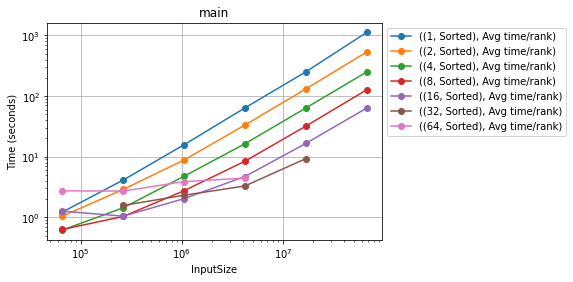

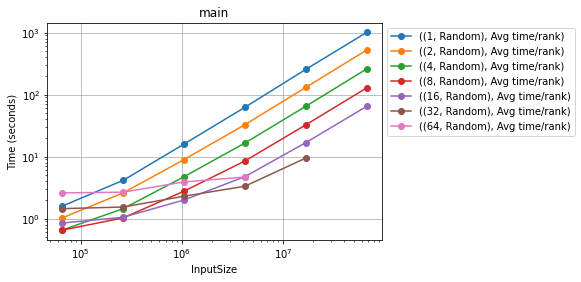

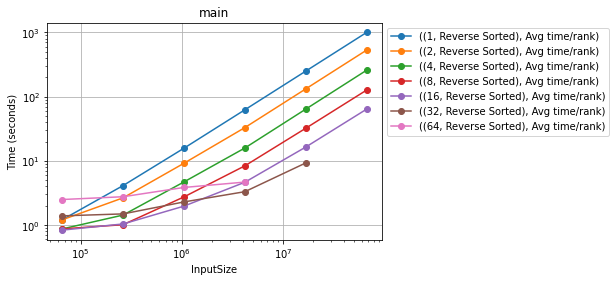

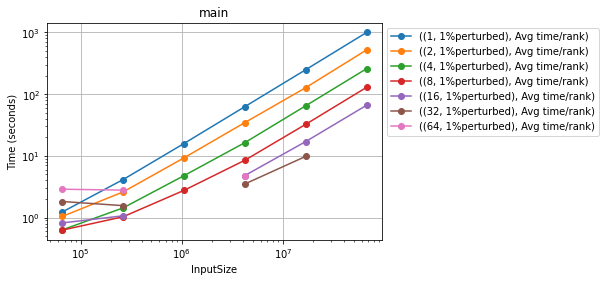

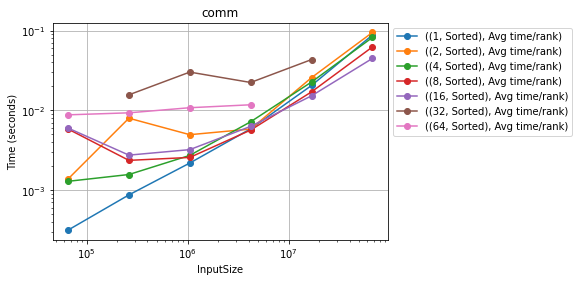

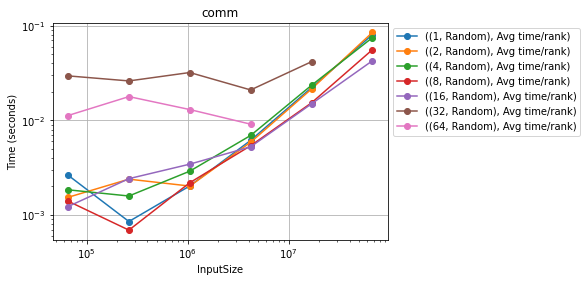

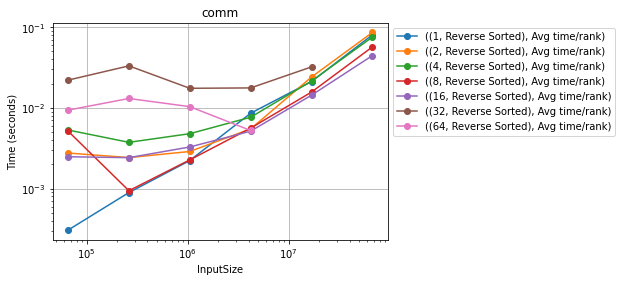

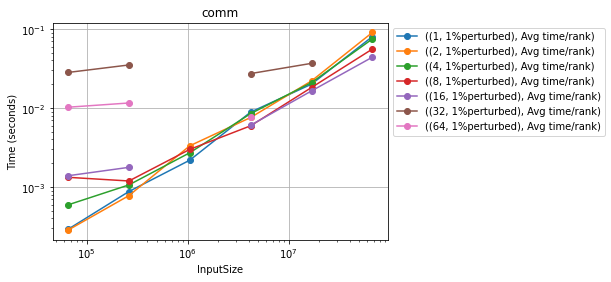

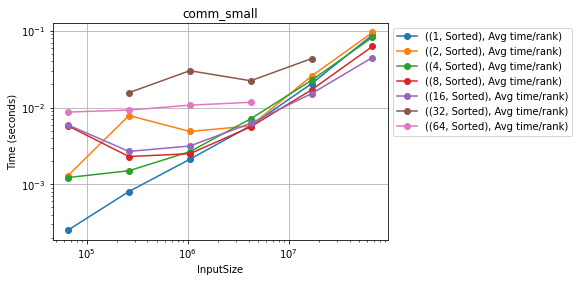

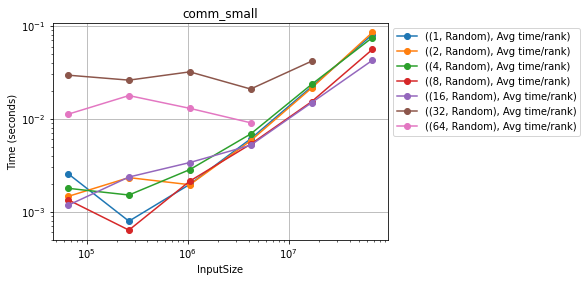

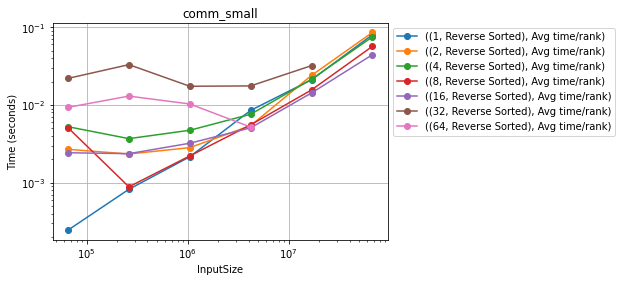

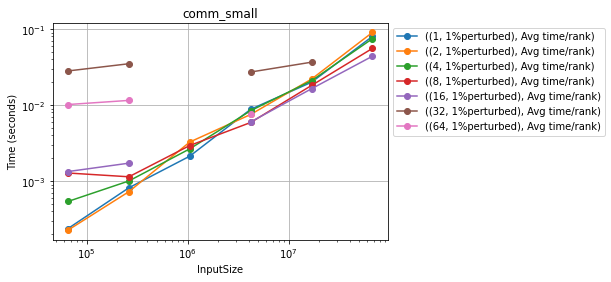

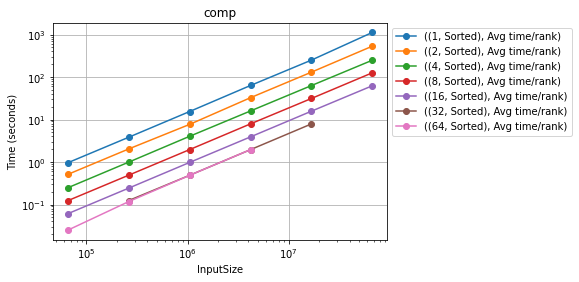

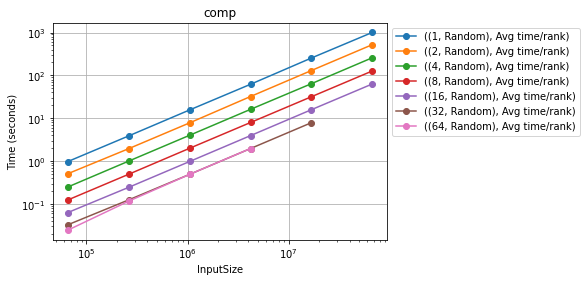

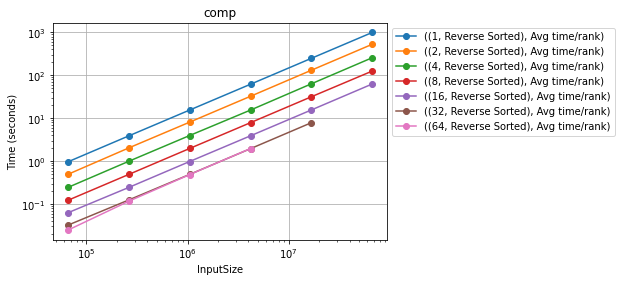

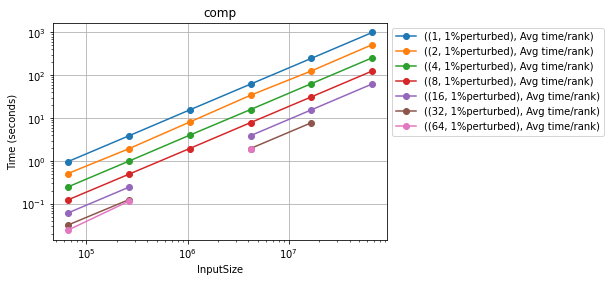

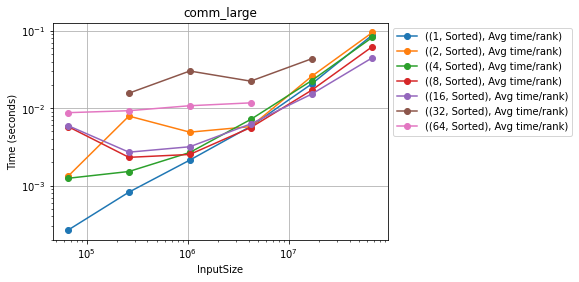

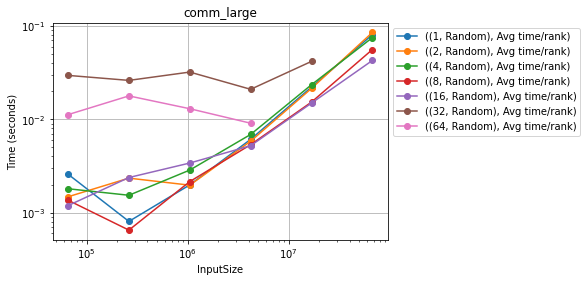

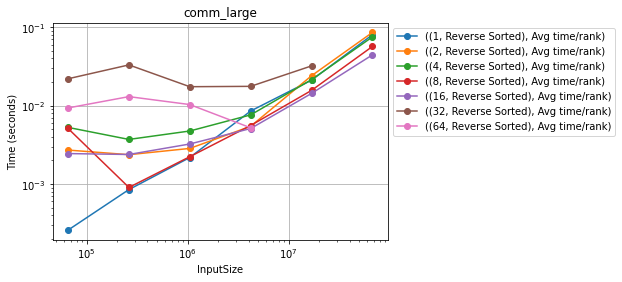

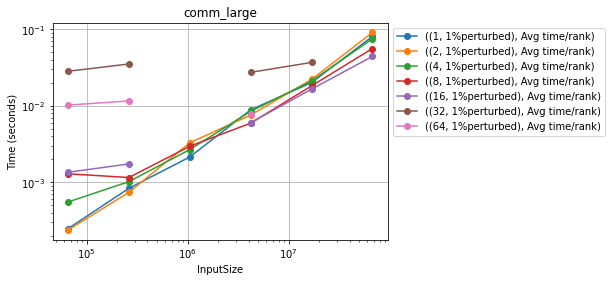

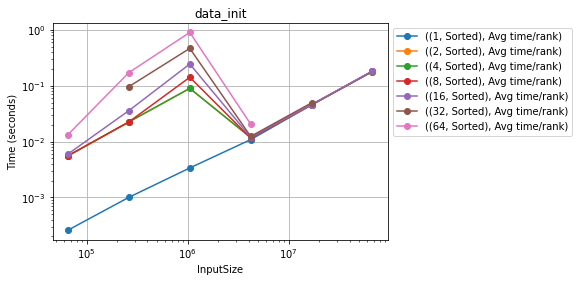

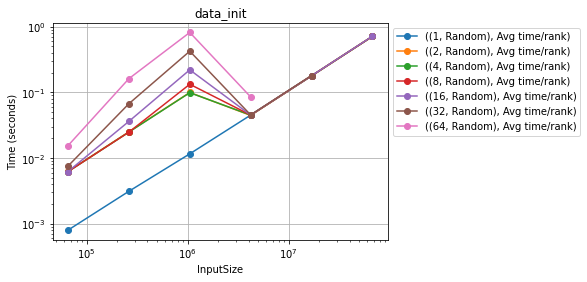

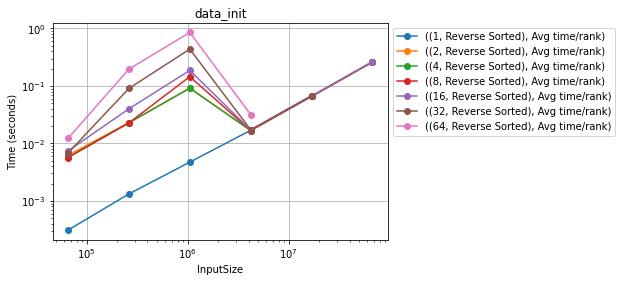

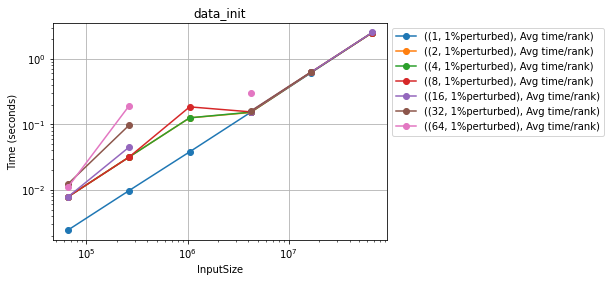

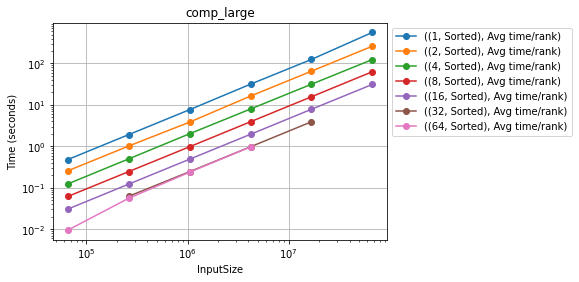

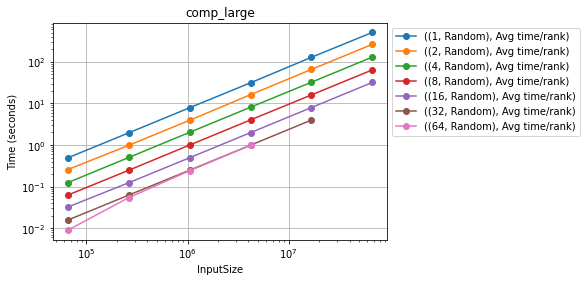

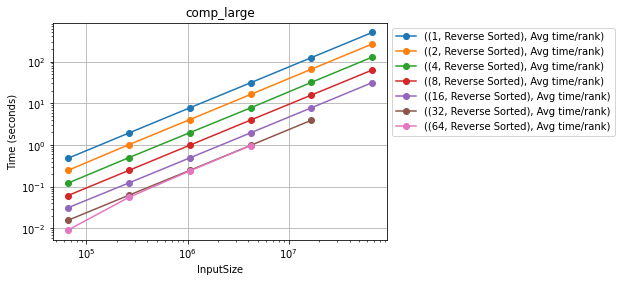

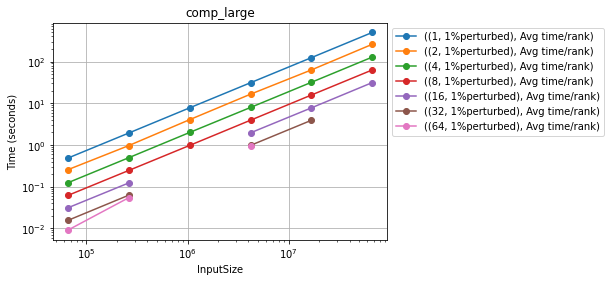

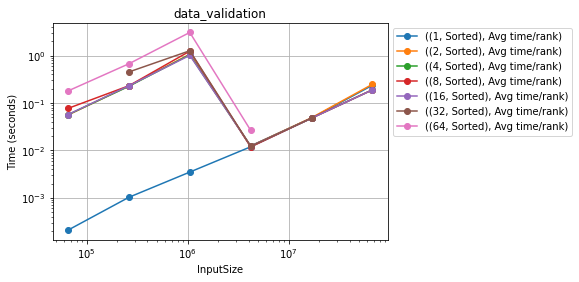

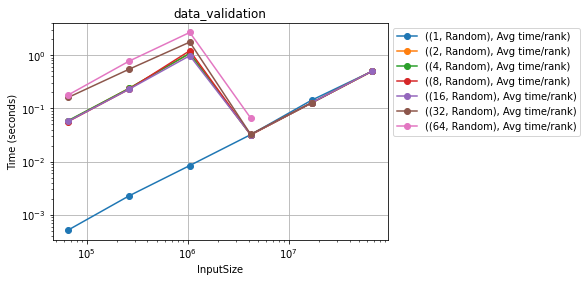

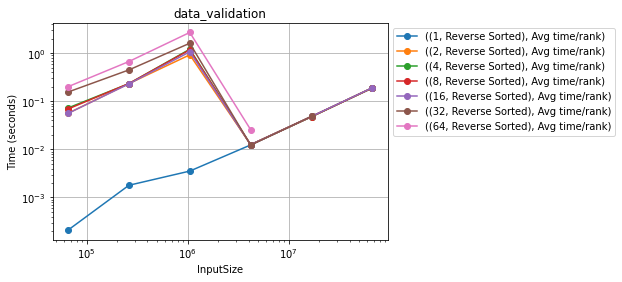

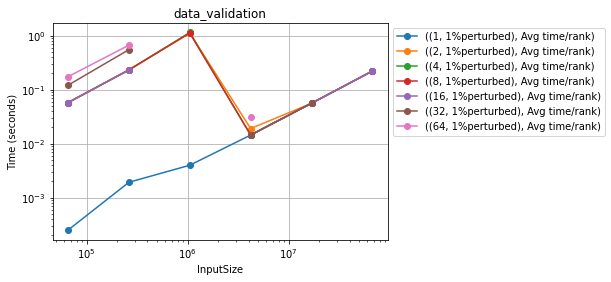

In [24]:
for name in function_names:
    for InputType in InputTypes:
        ax = plot_pandas(
            df=ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][1] == InputType and col[1] == "Avg time/rank"]].loc[name],
            title=name,
            xlabel="InputSize",
            ylabel="Time (seconds)",
            loglog=True
        )
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))